In [293]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [294]:
np.random.seed(7)

In [295]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-12-08 23:40:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-12-08 23:40:47 (209 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [296]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [297]:
### Convert to date time object

In [298]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [299]:
# Data visualization and pre-processing

In [300]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [301]:
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



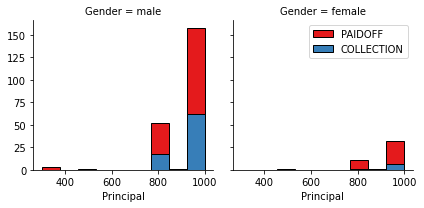

In [302]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

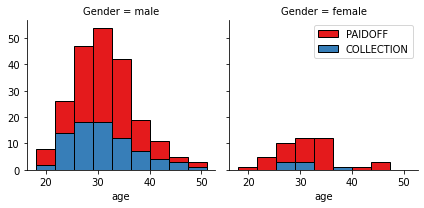

In [303]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [304]:
# Pre-processing:  Feature selection/extraction

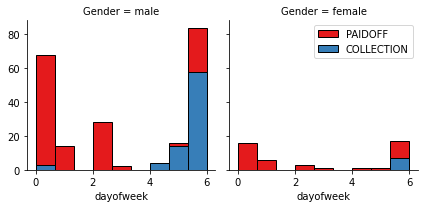

In [305]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [306]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [307]:
## Convert Categorical features to numerical values

In [308]:
####Let's convert male to 0 and female to 1:

In [309]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [310]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [311]:
## One Hot Encoding
#### How about education?

In [312]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [313]:
#### Features before One Hot Encoding

In [314]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [315]:
#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [316]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [317]:
### Feature Selection

In [318]:
#####Let's define feature sets, X:

In [319]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [320]:
y = df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0,1]).values
y[0:5]

array([0, 0, 0, 0, 0])

In [321]:
# Normalize Data

In [322]:
#Data Standardization give data zero mean and unit variance (technically should be done after train test split)

In [323]:
X=preprocessing.StandardScaler().fit_transform(X.astype(float))
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

In [324]:
# Classification

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
score_matrix={}

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [325]:
# Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
#You should use the following algorithm:

#   K Nearest Neighbor(KNN)
#   Decision Tree
#   Support Vector Machine
#   Logistic Regression


In [326]:
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
K = 15
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    knn_clf = KNeighborsClassifier(n_neighbors = n, metric='euclidean').fit(X_train,y_train)
    y_hat=knn_clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8142857142857143 with k= 14


In [327]:
y_hat=knn_clf.predict(X_test)
score_matrix['knn-f1-score']=f1_score(y_test, y_hat, average='micro')
score_matrix['knn-jaccord']=jaccard_score(y_test, y_hat, pos_label = 0)

In [328]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth = 6).fit(X_train,y_train)

In [329]:
y_hat = tree_clf.predict(X_test)
score_matrix['Tree-f1-score']=f1_score(y_test, y_hat, average='micro')
score_matrix['Tree-jaccord']=jaccard_score(y_test, y_hat, pos_label=0)

In [330]:
#SVM
from sklearn import svm
svm_clf = svm.SVC(C=1000.0, kernel='rbf', gamma='scale',).fit(X_train, y_train)
y_hat=svm_clf.predict(X_test)

In [331]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import itertools

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        59
           1       0.40      0.55      0.46        11

    accuracy                           0.80        70
   macro avg       0.65      0.70      0.67        70
weighted avg       0.83      0.80      0.81        70

Confusion matrix, without normalization
[[50  9]
 [ 5  6]]


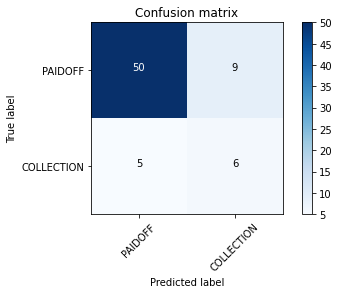

In [332]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [333]:
score_matrix['SVM-f1-score']=f1_score(y_test, y_hat, pos_label=0, average='micro')
score_matrix['SVM-jaccord']=jaccard_score(y_test, y_hat, pos_label=0)

In [334]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(C=0.001, solver='liblinear', multi_class='auto').fit(X_train,y_train)
y_hat = LR_clf.predict(X_test)
y_hat
y_proba = LR_clf.predict_proba(X_test)

In [335]:
score_matrix['LogReg-f1-score']=f1_score(y_test, y_hat, average='micro')
score_matrix['LogReg-jaccord']=jaccard_score(y_test, y_hat, pos_label=0)
score_matrix['LogReg-log-loss']=log_loss(y_test, y_proba)

In [336]:
score_matrix

{'knn-f1-score': 0.8142857142857143,
 'knn-jaccord': 0.8059701492537313,
 'Tree-f1-score': 0.8000000000000002,
 'Tree-jaccord': 0.8,
 'SVM-f1-score': 0.8000000000000002,
 'SVM-jaccord': 0.78125,
 'LogReg-f1-score': 0.6714285714285714,
 'LogReg-jaccord': 0.6515151515151515,
 'LogReg-log-loss': 0.6681424811200646}

In [337]:
# Model Evaluation using Test set

In [338]:
from sklearn.metrics import jaccard_score, f1_score, log_loss

In [339]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-12-08 23:41:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-12-08 23:41:03 (86.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [340]:
### Load Test set for evaluation
test_df = pd.read_csv('loan_test.csv')
test_df.shape

(54, 10)

In [341]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
X_test=preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
X_test[0:5]
y_test = test_df['loan_status'].values
y_test[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [342]:
Report = {'Algorithm': ["KNN","Decision_Tree","SVM","LogisticRegression"], 
          'Jaccard': [score_matrix['Tree-jaccord'],score_matrix['Tree-jaccord'],score_matrix['SVM-jaccord'],score_matrix['LogReg-jaccord']],
          'F1_score': [score_matrix['knn-f1-score'], score_matrix['Tree-f1-score'],score_matrix['SVM-f1-score'],score_matrix['LogReg-f1-score']],
          'LogLoss': ["NA", "NA","NA",score_matrix['LogReg-log-loss']]}
                      
df_report = pd.DataFrame(data=Report)
df_report

,Algorithm,Jaccard,F1_score,LogLoss
0,KNN,0.800000,0.814286,NA
1,Decision_Tree,0.800000,0.800000,NA
2,SVM,0.781250,0.800000,NA
3,LogisticRegression,0.651515,0.671429,0.668142
